# Tutorial: scATAC-seq data

We show an example of scRNA-seq data produced by 10X Chromium. 
We are using scATAC-seq data `500 Peripheral blood mononuclear cells (PBMCs) from a healthy donor (Next GEM v1.1)` (484 cells and 65,908 peaks) from [10X Genomics Datasets](https://www.10xgenomics.com/resources/datasets). The test data is directly available from `Peak by cell matrix HDF5 (filtered)` in [here](https://www.10xgenomics.com/resources/datasets/500-peripheral-blood-mononuclear-cells-pbm-cs-from-a-healthy-donor-next-gem-v-1-1-1-1-standard-2-0-0) (registration required).

We use [scanpy](https://scanpy.readthedocs.io/en/stable/) to read/write 10X data. Import numpy, scipy, and scanpy in addlition to screcode.

In [1]:
import screcode
import numpy as np
import scanpy as sc

Read in the count matrix into an [AnnData](https://anndata.readthedocs.io/en/latest/) object. 

In [2]:
input_filename = 'data/atac_pbmc_500_nextgem_filtered_peak_bc_matrix.h5'
adata = sc.readwrite._read_v3_10x_h5(input_filename)

## Apply RECODE
Apply RECODE to the count matrix. The **anndata** or **ndarray** data format is available. 

In [3]:
recode = screcode.RECODE(seq_target='ATAC')
adata = recode.fit_transform(adata)

start RECODE for scATAC-seq
end RECODE for scATAC-seq
log: {'seq_target': 'ATAC', '#significant peaks': 55207, '#non-significant peaks': 10697, '#silent peaks': 4, 'ell': 289, 'Elapsed_time': '36.5737[sec]'}


With anndata format, outputs of RECODE are included in anndata objects:
- denoised matrix -> adata.obsm['RECODE']
- noise variance -> adata.var['noise_variance_RECODE']
- normalized variance (NVSN variance) ->  adata.var['normalized_variance_RECODE']
- clasification of genes (significant/non-significant/silent) ->  adata.var['significance_RECODE']

In [4]:
adata

AnnData object with n_obs × n_vars = 484 × 65908
    var: 'gene_ids', 'feature_types', 'genome', 'noise_variance_RECODE', 'normalized_variance_RECODE', 'significance_RECODE'
    obsm: 'RECODE'

## Performance check
Check applicability:

applicabity: (A) Strongly applicable


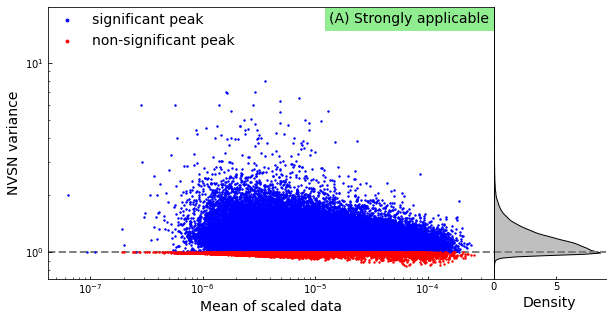

In [5]:
recode.check_applicability()

Show scatter plots of mean and variance of log-scaled data before and after RECODE

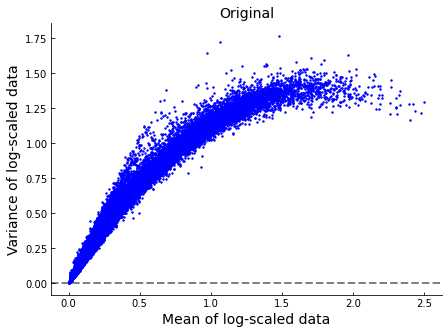

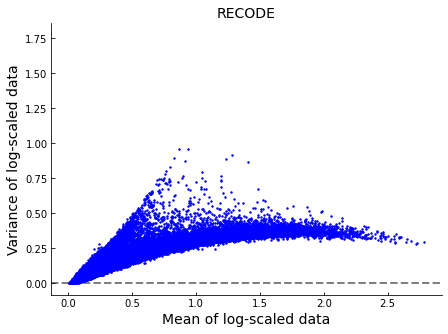

In [6]:
recode.plot_mean_variance()

Show scatter plots of mean and CV (coefficient of variation) before and after RECODE.

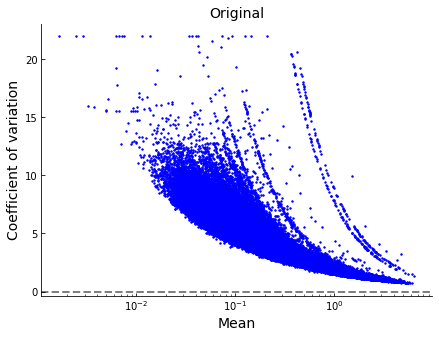

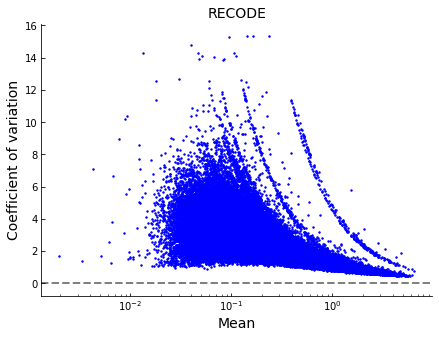

In [7]:
recode.plot_mean_cv()

Check the log.

In [8]:
recode.log_

{'seq_target': 'ATAC',
 '#significant peaks': 55207,
 '#non-significant peaks': 10697,
 '#silent peaks': 4,
 'ell': 289,
 'Elapsed_time': '36.5737[sec]',
 'Applicability': '(A) Strongly applicable',
 'Rate of 0 < normalized variance < 0.9': '0%',
 'Peak density of normalized variance': 0.9954193999046637}